In [3]:
# Read in file
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('market-research-p60.xlsx', sheet_name='Sheet1')
print(df.shape)
print(df.head())

(129, 15)
   TestNumber  Period    Product  Market  Score  Sample Size  Price  Quality  \
0          31      61  Product 1  Mexico  53.54          100    0.9      1.0   
1          32      61  Product 1  Mexico  61.31          100    0.8      1.0   
2          33      61  Product 1  Mexico  46.69          100    1.1      1.0   
3          34      61  Product 1  Mexico  38.74          100    1.2      1.0   
4          35      61  Product 1  Mexico  49.13          100    1.0      0.9   

   Marketing  Green  Baseline  Baseline Price  Baseline Quality  \
0        1.0    1.0     46.46               1                 1   
1        1.0    1.0     38.69               1                 1   
2        1.0    1.0     53.31               1                 1   
3        1.0    1.0     61.26               1                 1   
4        1.0    1.0     50.87               1                 1   

   Baseline Marketing  Baseline Green  
0                   1               1  
1                   1     

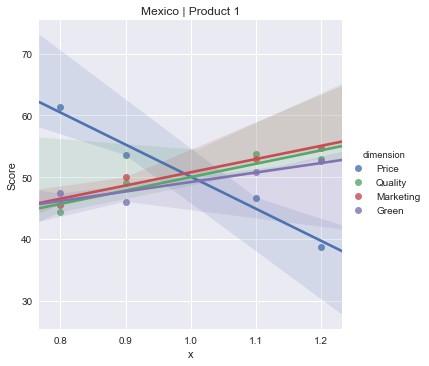

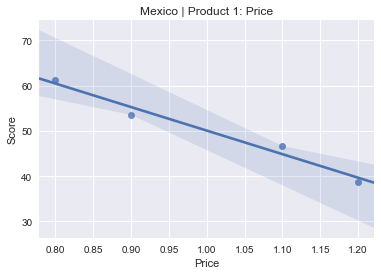

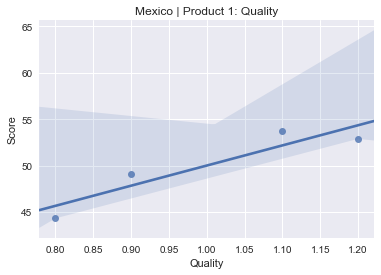

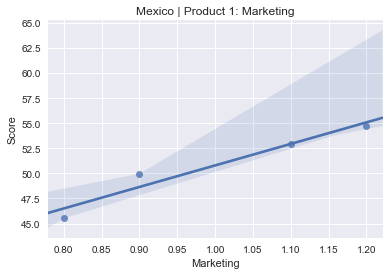

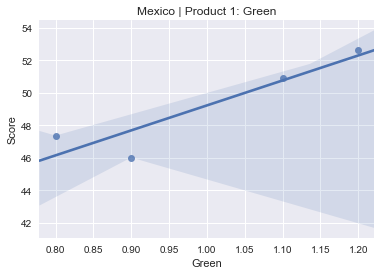

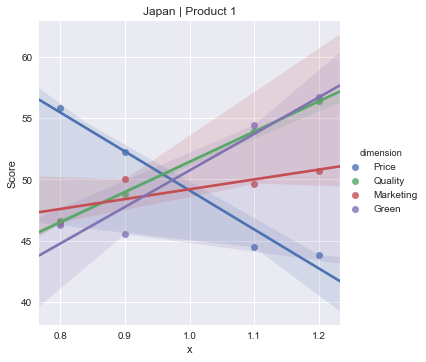

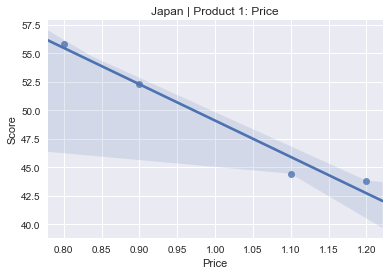

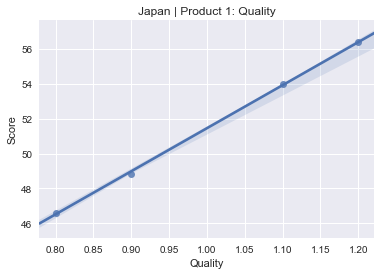

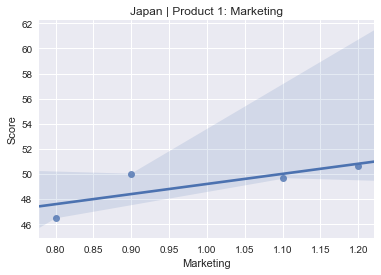

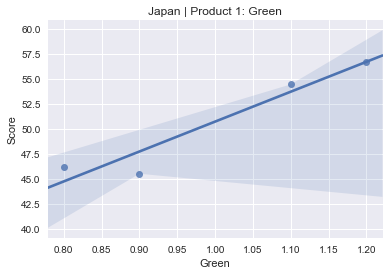

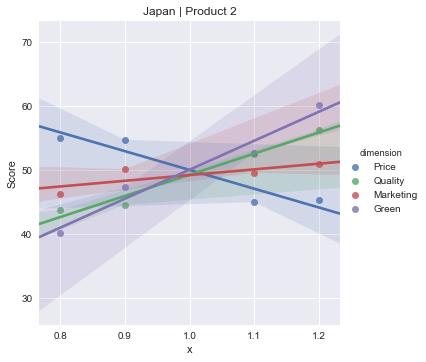

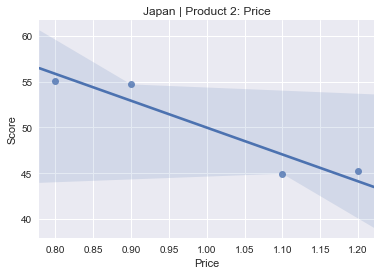

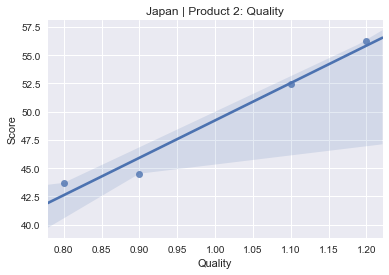

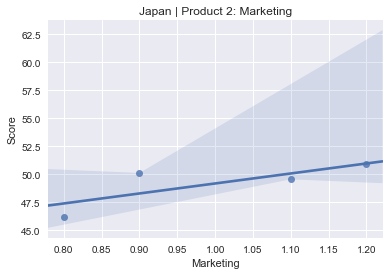

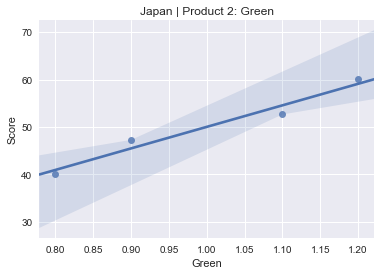

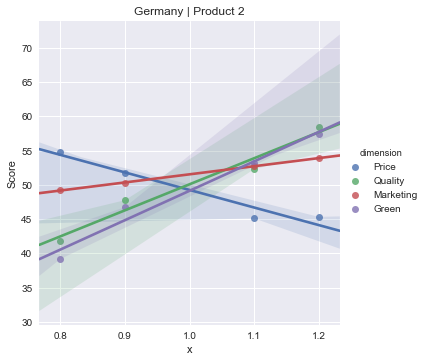

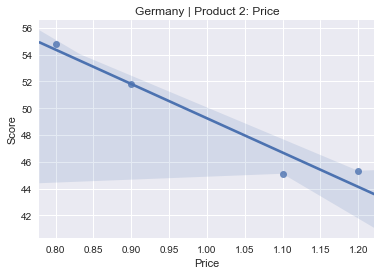

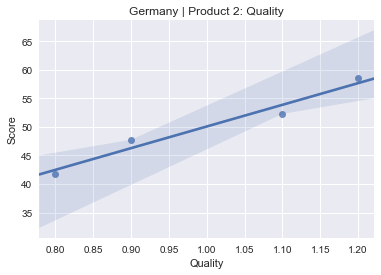

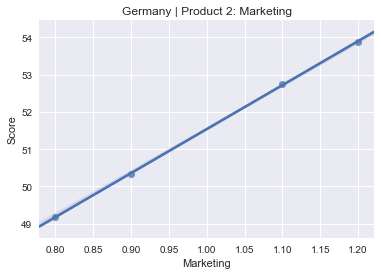

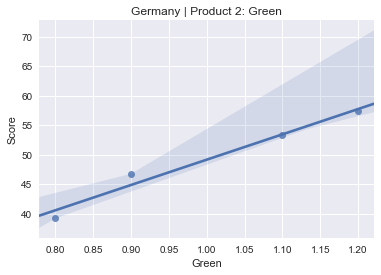

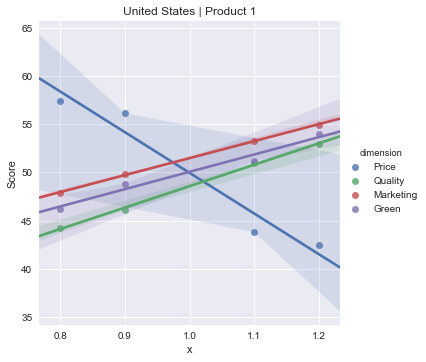

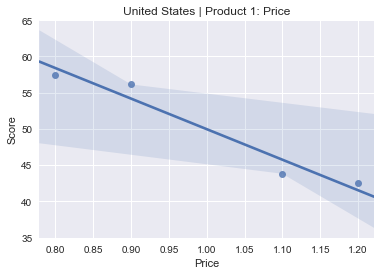

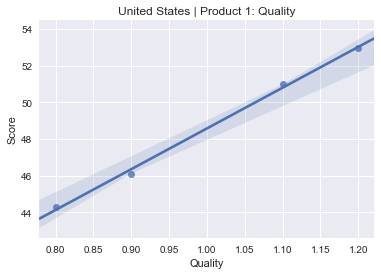

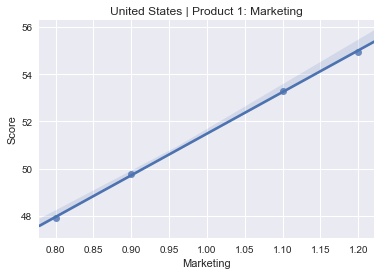

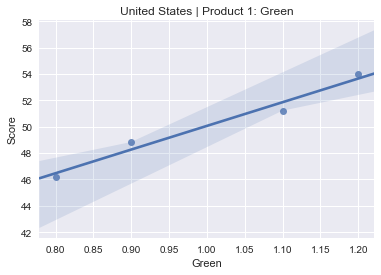

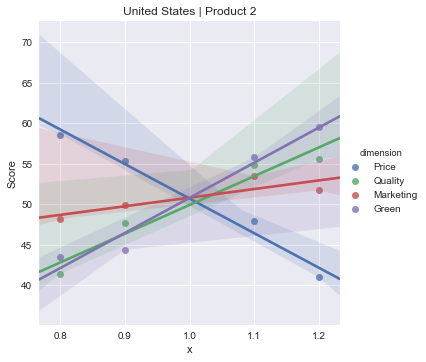

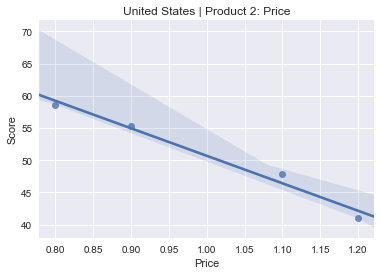

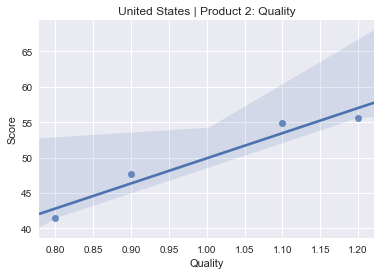

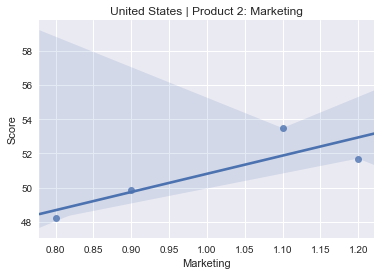

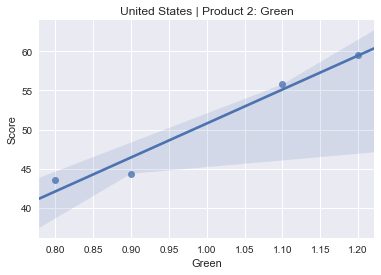

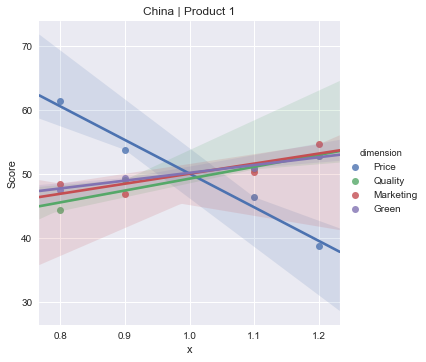

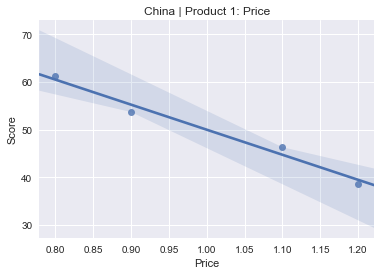

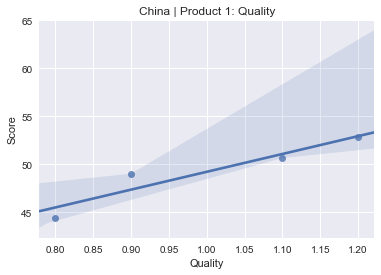

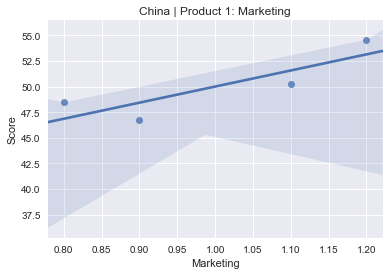

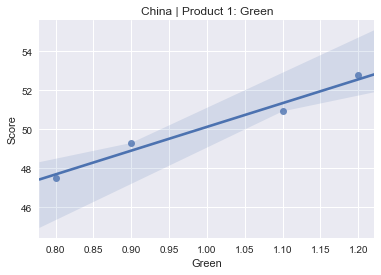

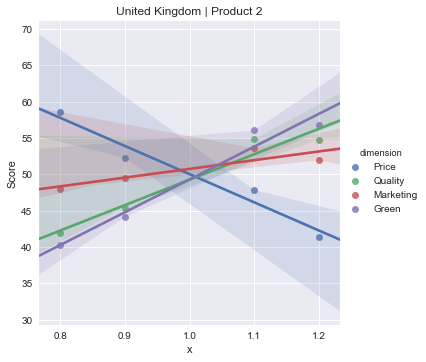

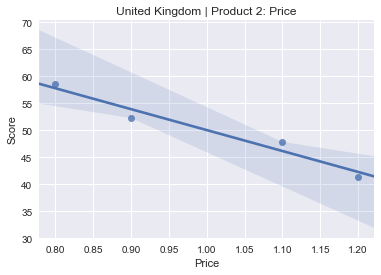

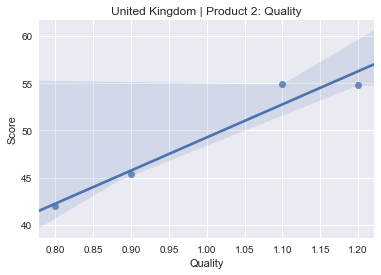

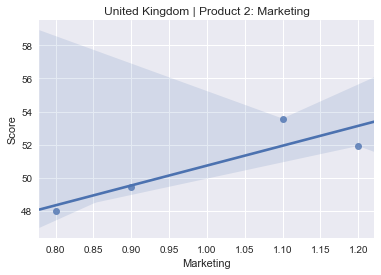

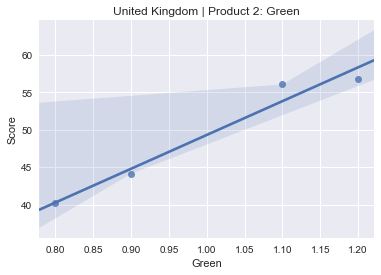

In [4]:

import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *

import matplotlib.cm as cm
%matplotlib inline

def label_dim (row):
   if row['Price'] != 1 :
      return 'Price'
   if row['Quality'] != 1 :
      return 'Quality'
   if row['Marketing'] != 1:
      return 'Marketing'
   if row['Green']  != 1:
      return 'Green'

def label_x (row):
   if row['Price'] != 1 :
      return row['Price']
   if row['Quality'] != 1 :
      return row['Quality']
   if row['Marketing'] != 1:
      return row['Marketing']
   if row['Green']  != 1:
      return row['Green']
    
# add labels for which dimension was tested
df['dimension'] = df.apply (lambda row: label_dim (row),axis=1)
# put all responses into one column
df['x'] = df.apply (lambda row: label_x (row),axis=1)

for country in ['Mexico', 'Japan', 'Germany', 'United States', 'China', 'United Kingdom']:
    countrydf = df.loc[df['Market'] == country]
    for prod in ['Product 1', 'Product 2']:
        proddf = countrydf.loc[countrydf['Product'] == prod]
        if not proddf.empty:
            g= sns.lmplot(x='x', y="Score", hue="dimension", data=proddf);
            g.axes.flatten()[0].set_title(country + " | " + prod)
            plt.show()
            for col in ['Price', 'Quality', 'Marketing', 'Green']:
                curdf = proddf.loc[proddf[col] != 1]

                sns.set(color_codes=True)
                sns.regplot(x=col, y="Score", data=curdf).set_title(country + " | " + prod + ': ' + col);
                plt.show()
                
                
                

<h2>Mexico P1</h2>
20% decrease in price equates to 10% increase in sales, with 95% confidence interval extending up to 20%.<br />
Marketing seems to be the second most important factor, but all other factors beside price see less than a 5% increase with a 20% increase in spending.<br />

<h2>Japan P2</h2>
Green value seems to be the most important factor here, with a 10% increase gleaned from a 20% increase in spending, and a 95CI extending up to 20% increase. <br />
Quality seems to be the next most important factor, but the 95CI makes it vague. <br />
Price shows less than a 5% impact with a 20% change in either direction, and very vague 95CI <br />
Marketing is similarly unimpactful

<h2>Germany P2</h2>
Green and Quality have very similar patterns, with Green 95CI having a slightly higher upside. Both could result in around a 7% increase in sales with a 20% increase in spending. <br />
Price sensitivity is low, with around 5% changes in either direction with a 20% change in cost<br />
Marketing is tightly linear, but yields less than a 5% change from a 20% increase<br />

<h2>US P2</h2>
The US seems most sensitive to both green value and price. Green value can account for a 10% increase sales with a 20% increase in the value, while price sees a similar 10% increase  in sales with a 20% drop in price. In price, the 95CI stretches upward, while Green stretches down, each by around 10%. <br />
The US is sensitive to less quality, but potentially less sensitive to more quality. <br />
Brand marketing shows 2-5% changes with 20% changes in input

<h2>China P1</h2>
Price is by far the biggest factor here, with 20% changes showing over 10% impact, and 95CI extending those gains and losses. <br />
Other factors seem less impactful, bringing around 5% changes with 20% changes in the ratings. Quality shows a questionable upside in the 95CI, and marketing a questionable downside. 

<h2>UK P2</h2>
Like the US, we see higher sensitivity to Green value and Price. Each has the potential for 10% swings with 20% changes to inputs, and both seem potentially more sensitive to negative movement than positive. <br />
Decreases in quality are more impactful than increases, and marketing changes account for about 2% change in the outputs.<br />

<h2>P1</h2>
Price is most important in China and Mexico. <br />

<h2>P2</h2>
Price and quality are most important in US and UK. <br />
Green and quality are most important in Japan and Germany. <br />
